In [48]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import scipy.io
import matplotlib.pyplot as plt


In [25]:
# --- CONFIGURACIÓN ---
input_folder = "./landscape"            # carpeta con las imágenes PNG/JPG
output_file = "landscape"           # nombre del archivo de salida
img_size = (256, 256)                  # tamaño deseado para todas las imágenes

# --- PROCESAMIENTO ---
image_data = []
filenames = []

for file in os.listdir(input_folder):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        path = os.path.join(input_folder, file)
        try:
            img = Image.open(path).convert("L").resize(img_size)
            image_data.append(np.asarray(img).flatten())
            filenames.append(file)
        except Exception as e:
            print(f"Error procesando {file}: {e}")

image_matrix = np.array(image_data).T  # columnas = imágenes

# --- GUARDAR EN .MAT ---
scipy.io.savemat(output_file, {
    'images': image_matrix,
    'filenames': filenames,
    'width': img_size[0],
    'height': img_size[1],
    'num_images': len(filenames)
})

print(f"Archivo .mat guardado como '{output_file}' con {len(filenames)} imágenes.")

Archivo .mat guardado como 'landscape' con 4319 imágenes.


In [26]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams.update({'font.size': 18})

mat_path= "landscape.mat"
mat_contents=scipy.io.loadmat(mat_path)

In [37]:
images = mat_contents['images']
filenames = mat_contents['filenames']
width = int(mat_contents['width'])
height = int(mat_contents['height'])
num_images = int(mat_contents['num_images'])

nlandscape = np.ndarray[(mat_contents['num_images'][0][0])]

/var/folders/d1/77jx9xlj7h346nxlh46dnk580000gn/T/ipykernel_1109/4188614719.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  width = int(mat_contents['width'])
/var/folders/d1/77jx9xlj7h346nxlh46dnk580000gn/T/ipykernel_1109/4188614719.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  height = int(mat_contents['height'])
/var/folders/d1/77jx9xlj7h346nxlh46dnk580000gn/T/ipykernel_1109/4188614719.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_images = int

In [41]:
landscape_df = pd.DataFrame(images)
landscape_array = landscape_df.to_numpy()


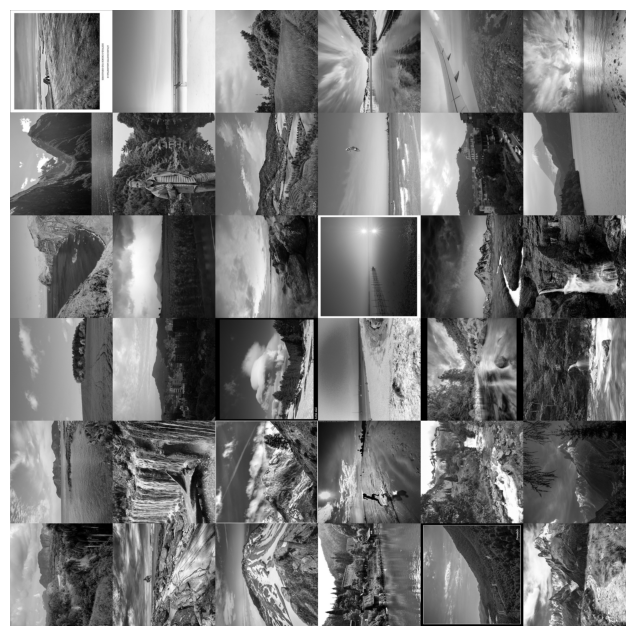

In [46]:
allLandscape = np.zeros((height * 6, width * 6))
count = 0

for j in range(6):
    for k in range(6):
        if count >= num_images:
            break

        reshaped_land = np.reshape(landscape_array[:, count], (height, width)).T
        allLandscape[j*height : (j+1)*height, k*width : (k+1)*width] = reshaped_land
        count += 1


plt.imshow(allPersons, cmap='gray')
plt.axis('off')
plt.show()


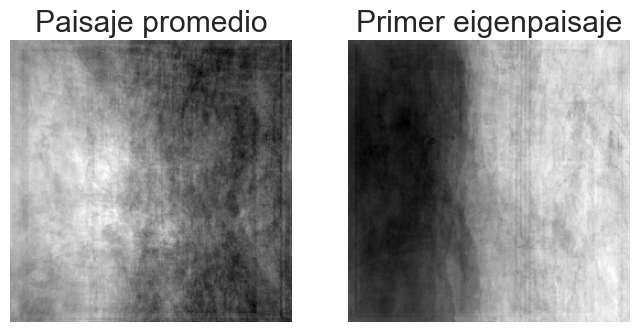

In [55]:
# --- DEFINIR PAISAJES DE ENTRENAMIENTO ---
num_training = min(36, images.shape[1])
trainingLandscape = images[:, :num_training]
avgLandscape = np.mean(trainingLandscape, axis=1)

# --- MATRIZ CENTRADA Y SVD ---
X = trainingLandscape - np.tile(avgLandscape, (num_training, 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=0)

# --- MOSTRAR RESULTADOS ---
plt.rcParams['figure.figsize'] = [8, 8]

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.imshow(np.reshape(avgLandscape, (height, width)).T, cmap='gray')
ax1.set_title('Paisaje promedio')
ax1.axis('off')

ax2 = fig1.add_subplot(122)
ax2.imshow(np.reshape(U[:, 0], (height, width)).T, cmap='gray')
ax2.set_title('Primer eigenpaisaje')
ax2.axis('off')

plt.show()

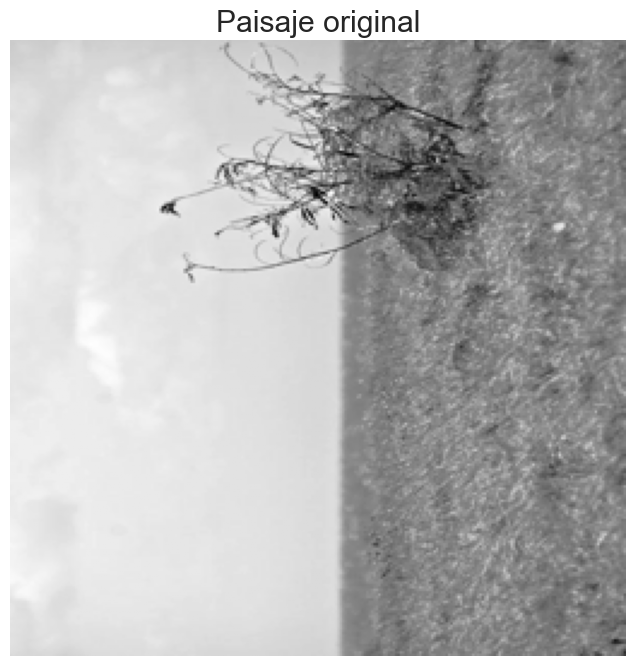

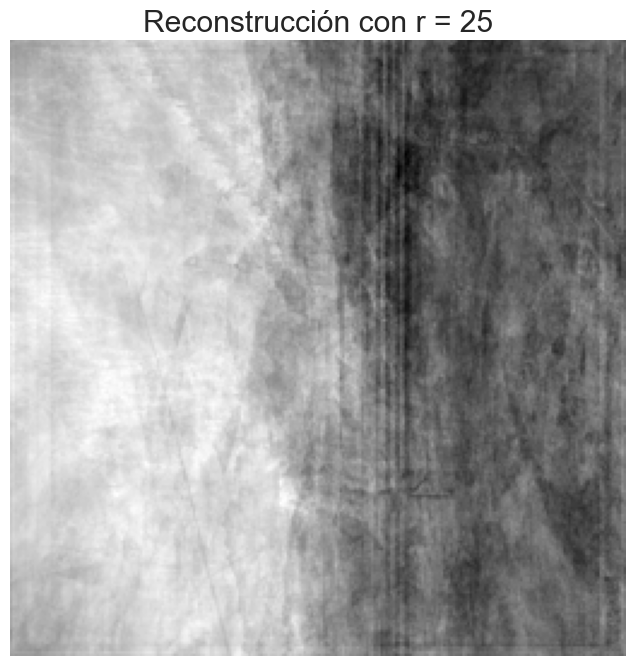

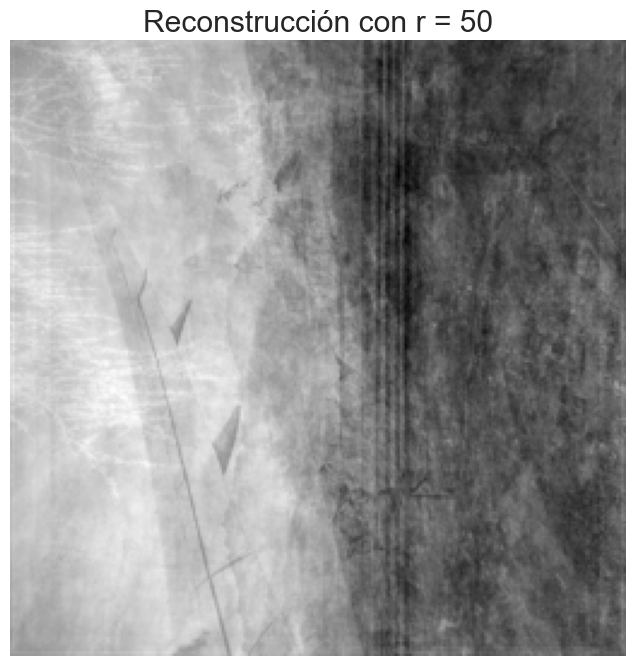

KeyboardInterrupt: 

In [56]:
if num_images > 36:
    testLandscape = images[:, 36]  # imagen número 37 (índice 36)
    plt.imshow(np.reshape(testLandscape, (height, width)).T, cmap='gray')
    plt.title('Paisaje original')
    plt.axis('off')
    plt.show()

    testLandscapeMS = testLandscape - avgLandscape
    r_list = [25, 50, 100, 200, 400, 800, 1600]

    for r in r_list:
        reconLandscape = avgLandscape + U[:, :r] @ U[:, :r].T @ testLandscapeMS
        plt.imshow(np.reshape(reconLandscape, (height, width)).T, cmap='gray')
        plt.title(f'Reconstrucción con r = {r}')
        plt.axis('off')
        plt.show()
else:
    print("No hay suficientes imágenes para seleccionar una imagen de prueba.")